# Popular CNNs
# The LeNet-5
Estas cuatro/cinco clases se dedicaran a unas redes neuronales (CNN) famosas por varias razones, por ser pioneras y haber ganado concursos imporantes.

* LeNet5
* AlexNet
* VGG-net
* otras.

La LeNet5 .
[Hay una familia](https://sh-tsang.medium.com/paper-brief-review-of-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-1f5f809dbf17) de LeNets.

De ellas la mas famosa es la LeNet 5.



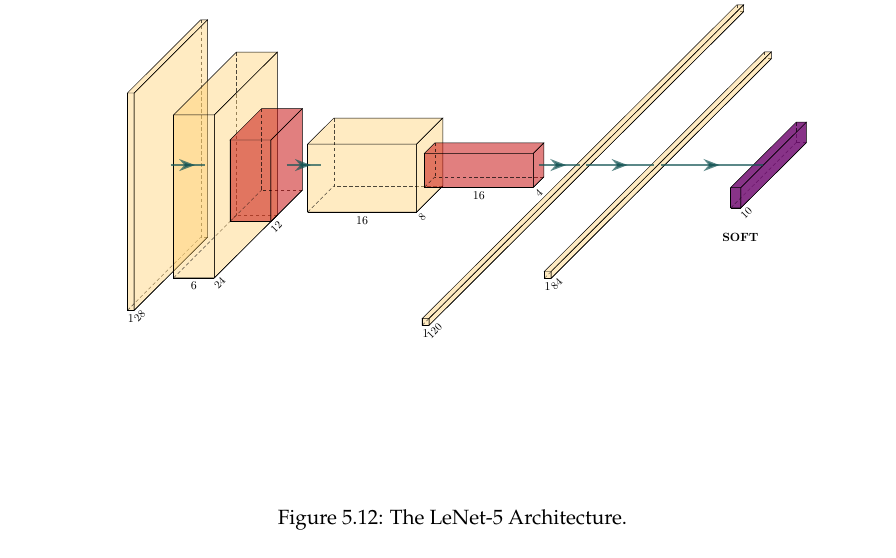

**Historia**: Yann LeCun (otros nombres Leon Bottow, Youshua Bengio y Patrick Haffner. 1998. El objeto era desarrollar OCR (Optical Character Recgonition Techniques). Usaron el  MNIST: Mondified National Institute of Standards. La razon por que esta red es tan popular por que fue el primer ejemplo efectivo de que el **backpropagation** funciona.

La red consiste de:
* Tres redes convolucionales (amarillas)
* 2 average pooling layers
* 1 fully connected (densa)
* clasificador softmax.


Veamos el detalle:
[La pagina](https://pub.towardsai.net/the-architecture-implementation-of-lenet-5-eef03a68d1f7) contiene
una descripcion detallada de la red y con muchas figuras.


Veamos la descripcion de la red:

* **L0**: Los datos de entrada. Son figuras de $28 \times 28$, en tonos de gris. Los datos del MNIST.

* **L1**: Es la primera capa convolutiva (tambien la llaman **C1**. El kernel es de $5 \times 5$, no padding ($p=0$) stride $s=1$. Esto reduce el tamanho de $28 \times 28$ a $24 \times 24$ , pues
$$28 - 5  + 1=24 $$. Se usan 6 filtros.  De acuerdo a esto los parametros

$$\# \text{parametros}=(5 \times 5 \times 1 +1) \times 6=156.  $$

En todos los casos vamos a usar una activacion ReLU

* **L1P**: La pooling layer tienen 6 filtros de tamanho $k_x=k_y=2$.
no tiene padding, strides $s=2$. **Recuerden que las pooling layers no tiene parameros**. El numero de "feature maps" es (para un solo lado del cuadrado)

$$\# \text{feature maps}= \left [  \frac{24 - 2}{2} +1 \right ]^2=864  $$


* **L2** o (**C2**): Esta es una convolucion con un kernel de $5 \times 5$, no padding, strides $s=1$. La salida tiene tamanho
$$(12-5)/1+1=8$$ ( o sea $8 \times 8$).  En cuanto a los parametros (training parameters)

$$\# \text{training parameters} = (5 \times 5 \times 6 + 1) \times 16=2416 $$

**L2P**: Es average pooling (**P2**). El kernel es de $2 \times 2$, stride $s=2$, $16$ "feature maps". La salida se reduce a
$$(8 -2)/2 +1 = 4$ es decir $4 \times 4$.

**L3**: El kernel es $4 \times 4$ (no hay padding no hay striding) entonces se reducen las dos dimensiones base a $1 \times 1$. Tiene 120 filtros El numero
de parametros es:

$$\# \text{training parameters} = (4 \times 4 \times 16+1) \times 120 = 30840 $$
La salida queda del tamnho $4 - 4 + 1$, es decir, $1 \times 1 \times  120 $

**L4**: Es fully conected (dense) **F1** conectada a 84 nodos (neuronas) de salida. Conteo de parametros


$$\# \text{training parameters} \quad (120 + 1)\times 84 =10164$$

Y para terminar estos 84 se conectan con los 10 ultimos nodos **F2** que albergan el resultado del **softmax** con un conteo de parametros de

$$\# \text{training parameters   } (84 + 1) \times 10 = 850 $$

## Implementacion con `TensorFlow` (Keras)




In [11]:
# import libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, AvgPool2D,MaxPooling2D
from keras import backend as K
from keras.utils import plot_model
# load mnist data
(train_x, train_y), (text_x,  test_y) = mnist.load_data()

In [12]:
print("he size of train_x is", train_x.shape)
print("he size of train_y is", train_y.shape)
print("he size of text_x is", text_x.shape)
print("he size of test_y is", test_y.shape)

he size of train_x is (60000, 28, 28)
he size of train_y is (60000,)
he size of text_x is (10000, 28, 28)
he size of test_y is (10000,)


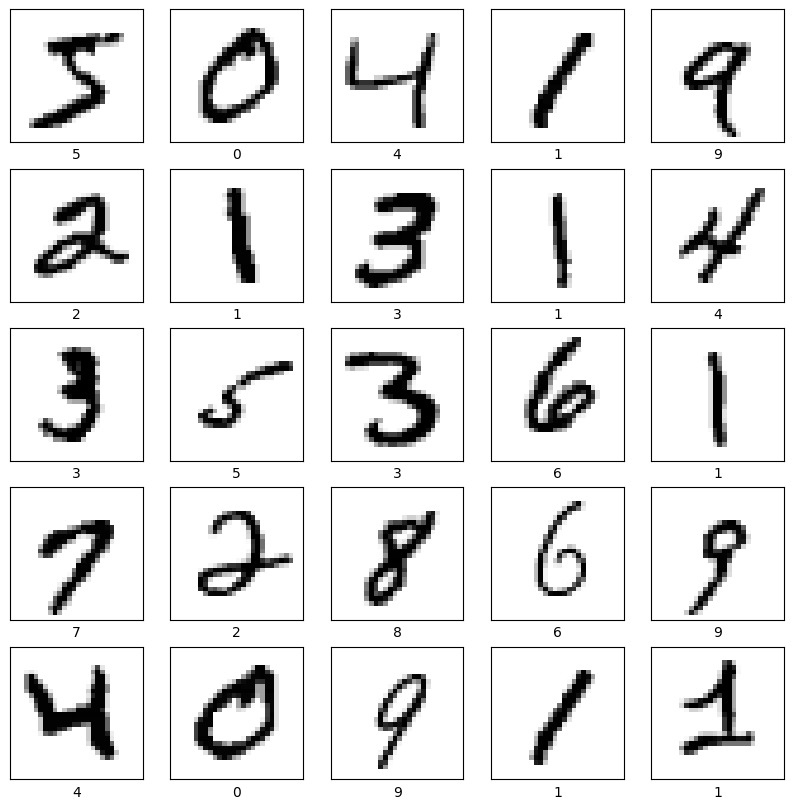

In [13]:
# Plot some data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)

    # Show true labels
    xlabel="{0}".format(train_y[i])
    plt.xlabel(xlabel)

plt.show()

In [14]:
# reshaping to convert to 4-rank tensor
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = text_x.reshape(text_x.shape[0], 28, 28, 1)

# normalization
train_x = train_x / 255.0
text_x = text_x / 255.0

# One-hot encoding the labels
train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)

# build the model architecture
model=Sequential()

model.add(Conv2D(6,
    kernel_size=(5,5),
    activation='relu',
    input_shape=(28,28,1)))

# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add convolutional filters=16
model.add(Conv2D(16,
    kernel_size=(5,5),
    activation='relu'))

# add pooling layer
model.add(AvgPool2D(pool_size=(2,2)))

# flatten layer
model.add(Flatten())

# dense 120
model.add(Dense(120, activation='relu'))

# dense  84
model.add(Dense(84, activation='relu'))

# dense 10
model.add(Dense(10, activation='softmax'))
model.summary()



# dense 84
model.add(Dense(84, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_x, train_y,
                  batch_size=128,
                  epochs=20,
                  verbose=1,
                  validation_data=(text_x, test_y))




Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4310 - loss: 1.5859 - val_accuracy: 0.7435 - val_loss: 0.6455
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8276 - loss: 0.5011 - val_accuracy: 0.9685 - val_loss: 0.1476
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9680 - loss: 0.1385 - val_accuracy: 0.9792 - val_loss: 0.0920
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.0798 - val_accuracy: 0.9793 - val_loss: 0.0775
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9841 - loss: 0.0613 - val_accuracy: 0.9844 - val_loss: 0.0616
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9866 - loss: 0.0484 - val_accuracy: 0.9873 - val_loss: 0.0449
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9891 - loss: 0.0397 - val_accuracy: 0.9867 - val_loss: 0.0456
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9927 - loss: 0.0276 - val_accuracy: 

In [43]:

# some plotting tools
def plot_example(X, y, y_pred=None):
    # create a figure 3x3 sub-plots
    fig, axes = plt.subplots(3, 3)
    fig.set_size_inches(11,11)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    # x,y = X[:9, ..., 0], y[:9]
    x,y = X[:9], y[:9]

    for i, ax in enumerate(axes.flat):
        #plot image
        ax.imshow(x[i])

        # show true and predicted classes
        xlabel="{0}, Pred: {1}".format(y[i], y_pred[i])
        ax.set_xlabel(xlabel)
        ax.imshow(x[i].reshape(28,28), cmap='binary')

        # show true an predicted class
        xlabel="{0}, Pred: {1}".format(y[i], y_pred[i] if y_pred is not None else 'None')
        ax.set_xlabel(xlabel)

        # labels
        ax.set_xlabel



        # remove ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # show the plot
    plt.show()

In [44]:
# final evaluation
score = model.evaluate(text_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05555173382163048
Test accuracy: 0.9872999787330627


In [45]:
# save the model
model.save('mnist_cnn.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


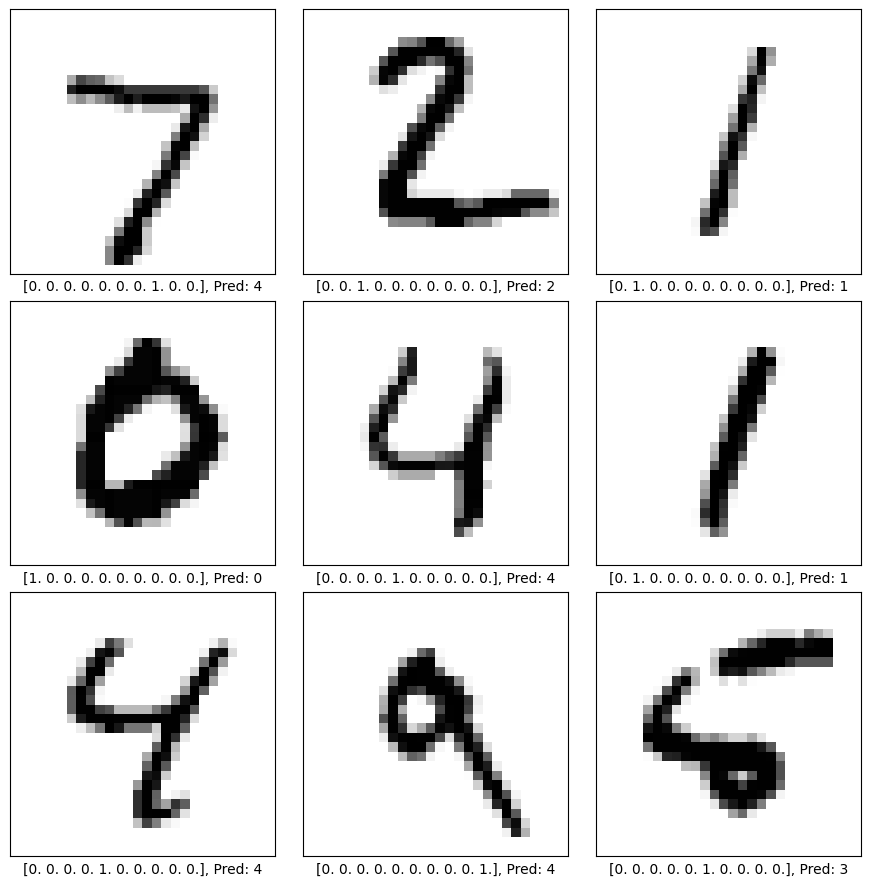

In [46]:
# further checking the model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# load the model
model = tf.keras.models.load_model('mnist_cnn.h5')

# make predictions
predictions = model.predict(test_x)

# retrieve prediction indices
pred_y = np.argmax(predictions, axis=1)

# plot some examples with model predictions
plot_example(test_x, test_y, pred_y)


<ipython-input-47-11a41401951c>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


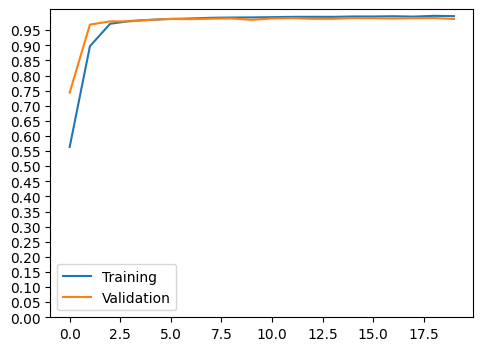

In [47]:
## Accuracy plots
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'])

    plt.yticks(np.arange(0, 1, 0.05))
plot_history(history)
